In [165]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원) 
import matplotlib.pyplot as plt  # 그래프
import seaborn as sns

# 스케일링
from sklearn.preprocessing import *

# 데이터 분할
from sklearn.model_selection import train_test_split  

# 모델링
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, SVR

# 검증
from sklearn.metrics import *

# 성능
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import statsmodels.api as sm

# Modeling
- 데이터로부터 패턴을 찾아 수학식으로 정리
- 오차가 적은 모델을 만드는 과정

### 목적
- 샘플을 가지고 전체를 추정

### 패턴을 찾는 방법 ( 머신러닝 알고리즘 )
	- 답이 있는 문제(지도학습) : 답을 알려주면서 패턴을 찾게하기.  
		숫자(회귀)와 범주(분류)의 답
	- 답이 없는 문제(비지도학습) : 비슷한 데이터끼리 모아서 데이터 안에서 패턴을 찾기

### 오차 : 실제 값 = 모델 + 오차
- 자료가 벗어나는 정도 ∑(실제 값 - 모델)^2




### 과정 : 데이터확인 및 전처리 -> 선언(설계) -> 학습(모델링) -> 검증(예측, 평가)

# sklearn 모델

## 회귀모델(Regression)

### 1) 데이터 확인 및 전처리

In [261]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

In [262]:
data.drop(['black'], axis = 1, inplace = True)

In [263]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [264]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

* 스케일링

In [265]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_st = st_scaler.fit_transform(x_train)
x_val_mm = mm_scaler.fit_transform(x_val)
x_val_st = st_scaler.fit_transform(x_val)

### 2. 선언

### LinearRegression


In [171]:
linear_model = LinearRegression()


### KNeighborsRegressor
* n_neighbors
* metric

In [172]:
k = int(y_val.count() ** 0.5)
k

12

In [173]:
knn_model_e_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_model_m_reg = KNeighborsRegressor(n_neighbors=k, metric='manhattan')

### 3. 학습

In [174]:
linear_model.fit(x_train, y_train)
knn_model_e_reg.fit(x_train_mm, y_train)
knn_model_m_reg.fit(x_train_mm, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=12)

### 4. 예측

In [175]:
linear_pred = linear_model.predict(x_val)
knn_e_pred = knn_model_e_reg.predict(x_val_mm)
mkk_m_pred = knn_model_m_reg.predict(x_val_mm)

### 5. 검증

In [176]:
name = ['LinearRegression', 'KNeighborsRegressor_e', 'KNeighborsRegressor_m']
list_pred = [linear_pred, knn_e_pred, mkk_m_pred]

for n, p in zip(name, list_pred):
    print(n)
    print(f'r2_score : {r2_score(y_val, p)}')
    print(f'mse : {mean_squared_error(y_val, p)}')
    print(f'rmse : {mean_squared_error(y_val, p, squared=False)}')
    print(f'mae : {mean_absolute_error(y_val, p)}')
    print(f'mape : {mean_absolute_percentage_error(y_val, p)}')
    print('**' * 15)

LinearRegression
r2_score : 0.6506052368021535
mse : 23.91381886412987
rmse : 4.890175749820232
mae : 3.343926930126733
mape : 0.18062750674327735
******************************
KNeighborsRegressor_e
r2_score : 0.6530949744838181
mse : 23.74341237207603
rmse : 4.872721249166222
mae : 3.384155701754386
mape : 0.1710794819514759
******************************
KNeighborsRegressor_m
r2_score : 0.6902253858186379
mse : 21.20207510964912
rmse : 4.604571110282598
mae : 3.1540570175438596
mape : 0.1600039046368711
******************************


## 분류모델(Classifier)

### 1) 데이터 확인 및 전처리

In [335]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4
...,...,...,...,...,...,...,...,...,...,...,...
1191,0,32,5,1555,Female,2,Married,5878,No,12,12
1192,0,27,19,1619,Male,1,Divorced,4066,No,11,7
1193,0,29,9,1558,Male,3,Married,2451,No,18,5
1194,0,29,2,469,Male,3,Married,4649,No,14,4


In [336]:
data.drop('EmployeeNumber', axis = 1, inplace = True)

In [337]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [338]:
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

In [339]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

* 스케일링

In [340]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_st = st_scaler.fit_transform(x_train)
x_val_mm = mm_scaler.fit_transform(x_val)
x_val_st = st_scaler.fit_transform(x_val)

### 2. 선언

### LogisticRegression

In [275]:
logtc_model = LogisticRegression()

In [276]:
k = int(y_val.count() ** 0.5)
k

18

### KNeighborsClassifier
* n_neighbors
* metric

In [277]:
knn_model_cla_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_model_cla_m = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

### DecisionTreeClassifier
* max_depth
* min_samples_leaf

In [278]:
dtree_model = DecisionTreeClassifier(max_depth=3)

### SVC
* C
* gamma

In [279]:
svc_model = SVC(C=10, gamma=50)

### 3. 학습

In [280]:
logtc_model.fit(x_train, y_train)
dtree_model.fit(x_train, y_train)
knn_model_cla_e.fit(x_train_mm, y_train)
knn_model_cla_m.fit(x_train_mm, y_train)
svc_model.fit(x_train_mm, y_train)


c:\Users\mskyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=10, gamma=50)

### 4. 예측

In [281]:
logtc_pred = logtc_model.predict(x_val)
knn_e_pred = knn_model_cla_e.predict(x_val_mm)
knn_m_pred = knn_model_cla_m.predict(x_val_mm)
dtree_pred = dtree_model.predict(x_val)
svc_pred = svc_model.predict(x_val_mm)

### 5. 검증

In [282]:
name = ['LogisticRegression', 'KNeighborsClassifier_e', 'KNeighborsClassifier_m', 'DecisionTreeClassifier', 'SVC']
list_pred = [logtc_pred, knn_e_pred, knn_m_pred, dtree_pred, svc_pred]

for n, p in zip(name, list_pred):
    print(n)
    print(confusion_matrix(y_val, p))
    print(classification_report(y_val, p))
    print('**'*15)

LogisticRegression
[[305   6]
 [ 39   9]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       311
           1       0.60      0.19      0.29        48

    accuracy                           0.87       359
   macro avg       0.74      0.58      0.61       359
weighted avg       0.85      0.87      0.84       359

******************************
KNeighborsClassifier_e
[[311   0]
 [ 45   3]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       1.00      0.06      0.12        48

    accuracy                           0.87       359
   macro avg       0.94      0.53      0.53       359
weighted avg       0.89      0.87      0.82       359

******************************
KNeighborsClassifier_m
[[311   0]
 [ 46   2]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       311
           1       1.00      0.04      0.

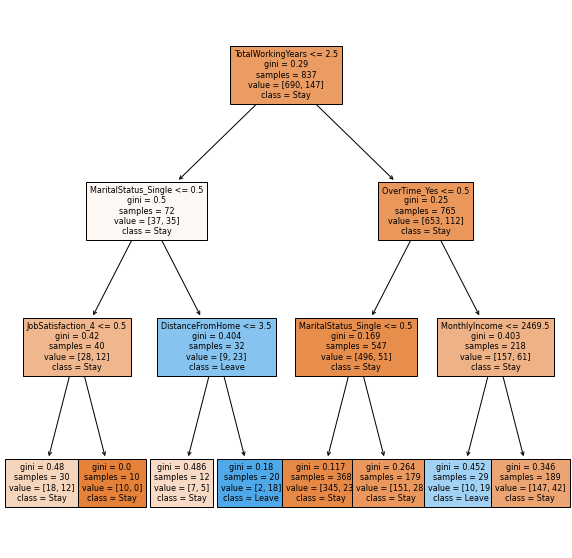

In [283]:
plt.figure(figsize=(10,10))
plot_tree(dtree_model
        , feature_names = list(x_train)
        , class_names= ['Stay', 'Leave']
        , filled = True
        , fontsize = 8)
plt.show()

# 성능 튜닝

### 변수 선택 - AIC
* 값이 작을 수록 좋은 모델

In [285]:
# 아래 함수는 로지스틱 회귀를 위한 전진선택법 함수 입니다.
import statsmodels.api as sm

def forward_stepwise_logistic(x_train, y_train):

    # 변수목록, 선택된 변수 목록, 단계별 모델과 AIC 저장소 정의
    features = list(x_train) # 컬럼명
    selected = []
    step_df = pd.DataFrame({ 'step':[], 'feature':[],'aic':[]})

    for s in range(0, len(features)) :
        result =  { 'step':[], 'feature':[],'aic':[]}

        # 변수 목록에서 변수 한개씩 뽑아서 모델에 추가
        for f in features :
            vars = selected + [f]
            x_tr = x_train[vars]
            model = sm.Logit(y_train, x_tr).fit(disp=False)
            result['step'].append(s+1)
            result['feature'].append(vars)
            result['aic'].append(model.aic)
        
        # 모델별 aic 집계
        temp = pd.DataFrame(result).sort_values('aic').reset_index(drop = True)

        # 만약 이전 aic보다 새로운 aic 가 크다면 멈추기
        if step_df['aic'].min() < temp['aic'].min() :
            break
        step_df = pd.concat([step_df, temp], axis = 0).reset_index(drop = True)

        # 선택된 변수 제거
        v = temp.loc[0,'feature'][s]
        features.remove(v)

        selected.append(v)
    
    # 선택된 변수와 step_df 결과 반환
    return selected, step_df

In [286]:
vars, result = forward_stepwise_logistic(x_train, y_train)

In [287]:
vars

['Age',
 'OverTime_Yes',
 'MaritalStatus_Single',
 'JobSatisfaction_4',
 'DistanceFromHome',
 'MonthlyIncome',
 'Gender_Male',
 'JobSatisfaction_2',
 'JobSatisfaction_3']

In [288]:
result.sort_values(by='aic')

,step,feature,aic
68,9.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",646.638342
63,8.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",650.805125
64,8.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",651.409337
57,7.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",651.635163
69,9.0,"[Age, OverTime_Yes, MaritalStatus_Single, JobS...",651.923762
...,...,...,...
7,1.0,[JobSatisfaction_4],1003.695976
8,1.0,[JobSatisfaction_3],1052.206425
9,1.0,[JobSatisfaction_2],1085.768844
10,1.0,[MaritalStatus_Single],1108.482154


### 하이퍼파라미터 튜닝

### 1. Ramdom Search

In [289]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [290]:
params = { 'n_neighbors' : range(1,51), 'metric' : ['euclidean', 'manhattan']  }
params

{'n_neighbors': range(1, 51), 'metric': ['euclidean', 'manhattan']}

In [291]:
model = KNeighborsClassifier()

model_rs = RandomizedSearchCV(model
                            , params
                            , cv=5
                            , n_iter=5
                            )

In [292]:
model_rs.fit(x_train_mm, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 51)})

In [296]:
model_rs.cv_results_

{'mean_fit_time': array([0.00159588, 0.00139585, 0.0011971 , 0.00098944, 0.00100656]),
 'std_fit_time': array([4.88835273e-04, 4.88791827e-04, 3.99231950e-04, 2.42709645e-05,
        7.51438478e-06]),
 'mean_score_time': array([0.00763006, 0.00817976, 0.00818682, 0.00597653, 0.00697241]),
 'std_score_time': array([1.44144397e-03, 7.46079273e-04, 1.16128758e-03, 6.32759596e-04,
        2.12284133e-05]),
 'param_n_neighbors': masked_array(data=[5, 12, 31, 14, 40],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['manhattan', 'euclidean', 'euclidean', 'manhattan',
                    'euclidean'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5, 'metric': 'manhattan'},
  {'n_neighbors': 12, 'metric': 'euclidean'},
  {'n_neighbors': 31, 'metric': 'euclidean'},
  {'n_neighbors': 14, 'metric': 'manhattan'},
  

In [297]:
model_rs.best_estimator_

KNeighborsClassifier(metric='manhattan')

In [298]:
model_rs.best_params_

{'n_neighbors': 5, 'metric': 'manhattan'}

In [299]:
model_rs.best_score_

0.8255702879954377

In [300]:
pred = model_rs.predict(x_val_mm)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       311
           1       0.39      0.19      0.25        48

    accuracy                           0.85       359
   macro avg       0.64      0.57      0.59       359
weighted avg       0.82      0.85      0.83       359



In [301]:
params = {'max_depth' : range(1,11)
          , 'min_samples_leaf' : range(10,101,10)}

In [302]:
model = DecisionTreeClassifier()
model_r = RandomizedSearchCV(model
                             , params
                             , cv=5
                             , n_iter=20)


In [303]:
model_r.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'max_depth': range(1, 11),
                                        'min_samples_leaf': range(10, 101, 10)})

In [304]:
df = pd.DataFrame(model_r.cv_results_)[['param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]
df['param_max_depth'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   param_max_depth         20 non-null     object 
 1   param_min_samples_leaf  20 non-null     object 
 2   mean_test_score         20 non-null     float64
dtypes: float64(1), object(2)
memory usage: 608.0+ bytes


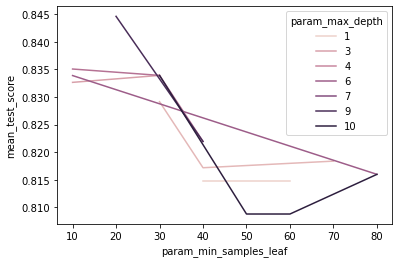

In [305]:
sns.lineplot(data=df, x='param_min_samples_leaf', y='mean_test_score', hue='param_max_depth')
plt.show()

In [306]:
model_r.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=20)

In [307]:
model_r.best_params_

{'min_samples_leaf': 20, 'max_depth': 9}

In [308]:
model_r.best_score_

0.8446250356429997

In [309]:
pred = model_r.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       311
           1       0.34      0.31      0.33        48

    accuracy                           0.83       359
   macro avg       0.62      0.61      0.61       359
weighted avg       0.82      0.83      0.82       359



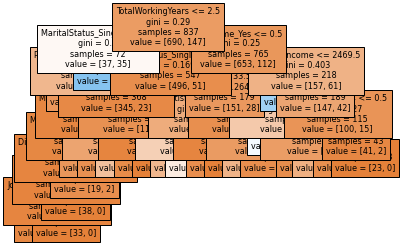

In [310]:
plot_tree(model_r.best_estimator_
            , feature_names = list(x_train)
            , filled = True
            , fontsize=8
            )
plt.show()

### 2. Grid Search

In [312]:
params = { 'n_neighbors' : range(3,31,2), 'metric' : ['euclidean', 'manhattan']  }
params

{'n_neighbors': range(3, 31, 2), 'metric': ['euclidean', 'manhattan']}

In [313]:
model = KNeighborsClassifier()
model_gs = GridSearchCV(model, params, cv=5)

In [314]:
model_gs.fit(x_train_mm, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(3, 31, 2)})

In [315]:
df = pd.DataFrame(model_gs.cv_results_)[['param_metric', 'param_n_neighbors', 'mean_test_score']]

df['param_n_neighbors'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   param_metric       28 non-null     object 
 1   param_n_neighbors  28 non-null     object 
 2   mean_test_score    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


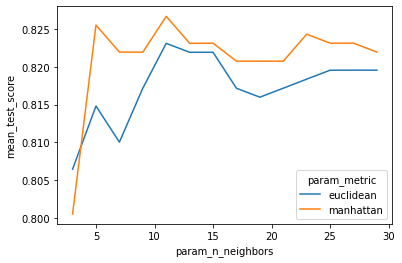

In [316]:
sns.lineplot(data=df, x='param_n_neighbors', y='mean_test_score', hue='param_metric')
plt.show()

In [317]:
model_gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [318]:
model_gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [319]:
model_gs.best_score_

0.826732249786142

In [320]:
pred = model_gs.predict(x_val_mm)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       311
           1       0.67      0.21      0.32        48

    accuracy                           0.88       359
   macro avg       0.78      0.60      0.63       359
weighted avg       0.86      0.88      0.85       359



In [321]:
params =  {'max_depth' : range(1,11)
           , 'min_samples_leaf' : range(10,101,10)}

In [322]:
model_decision = DecisionTreeClassifier()
model_grid = GridSearchCV(model_decision, params, cv=5)

In [323]:
model_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(10, 101, 10)})

In [324]:
model_grid.cv_results_

{'mean_fit_time': array([0.00279245, 0.00180969, 0.00198493, 0.00159044, 0.00139756,
        0.00140276, 0.00179448, 0.00119252, 0.00159674, 0.0012013 ,
        0.00160213, 0.00139432, 0.00178967, 0.00139399, 0.00158663,
        0.00159597, 0.00159564, 0.00219436, 0.00179076, 0.00300064,
        0.00318871, 0.00238857, 0.00239067, 0.00159564, 0.00199027,
        0.00199442, 0.00199485, 0.00199437, 0.0021935 , 0.00220065,
        0.00200429, 0.00139318, 0.00199571, 0.00179386, 0.00179424,
        0.00160232, 0.00158548, 0.00239348, 0.00139608, 0.00159597,
        0.00199761, 0.00200114, 0.00200682, 0.00139103, 0.00179563,
        0.00180163, 0.00199451, 0.00199857, 0.0016037 , 0.00180373,
        0.00198894, 0.00200405, 0.00180206, 0.00199089, 0.0017952 ,
        0.00180302, 0.00159473, 0.00158868, 0.00158062, 0.00140038,
        0.0019908 , 0.00218835, 0.00219607, 0.00298357, 0.00339074,
        0.00398893, 0.00239096, 0.0021914 , 0.00139627, 0.00139632,
        0.00199142, 0.00218406,

In [325]:
model_grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [326]:
model_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 20}

In [327]:
model_grid.best_score_

0.8446392928428856

In [328]:
pred = model_grid.predict(x_val)
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       311
           1       0.50      0.23      0.31        48

    accuracy                           0.87       359
   macro avg       0.70      0.60      0.62       359
weighted avg       0.84      0.87      0.84       359



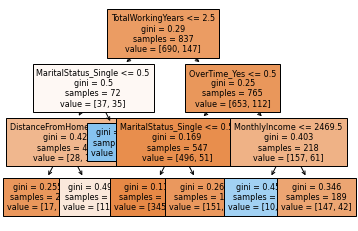

In [329]:
plot_tree(model_grid.best_estimator_
        , feature_names = list(x_train)
        , filled = True
        , fontsize=8
        )
plt.show()

### 일반화 성능 - 성능의 평균
* 모델링은 데이터의 부분집합을 학습하여 모집단을 예측
* train 데이터를 랜덤으로 추출하여 학습하기 때문에 분할되는 데이터에 따라 정확도가 달라짐


### 1. 모델링 반복을 통해 평균 성능 측정

In [333]:
result = []
for i in range(100):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

    model = DecisionTreeClassifier(max_depth = 3)
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    result.append(accuracy_score(y_val, pred))

In [234]:
np.mean(result), np.std(result)

(0.8427083333333334, 0.02059341015146997)

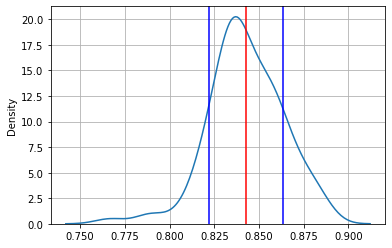

In [235]:
sns.kdeplot(result)
plt.axvline(np.mean(result), color = 'r')
plt.axvline(np.mean(result) + np.std(result), color = 'b')
plt.axvline(np.mean(result) - np.std(result), color = 'b')
plt.grid()
plt.show()


### 2. k-fold cross validation

In [236]:
from sklearn.model_selection import cross_val_score

In [237]:
model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

In [238]:
# cv : cross val
dt_result = cross_val_score(model, x, y, cv=10)
print(dt_result)
print(dt_result.mean(), dt_result.std())

[0.84166667 0.81666667 0.85       0.81666667 0.825      0.8
 0.8487395  0.83193277 0.83193277 0.83193277]
0.8294537815126051 0.014751469956440336


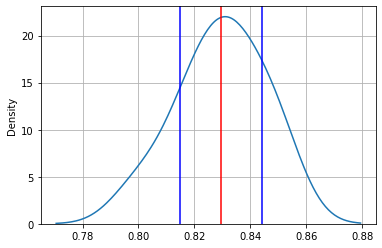

In [239]:
sns.kdeplot(dt_result)
plt.axvline(np.mean(dt_result), color = 'r')
plt.axvline(np.mean(dt_result) + np.std(dt_result), color = 'b')
plt.axvline(np.mean(dt_result) - np.std(dt_result), color = 'b')
plt.grid()
plt.show()


### 일반화 성능 - 데이터 늘리기
* train 데이터 크기에 따른 모델의 성능
* 일정 크기 이상의 데이터에서 성능 개선 효과가 줄어들고 처리 속도가 느려짐
* variance(성능의 편차)와 bias(오차)를 줄여야 한다.
* train_sizes 최대 크기 : 전체 데이터 크기 - (전체 데이터 크기 / cv)

In [240]:
from sklearn.model_selection import learning_curve

In [341]:
x.shape

(1196, 12)

In [342]:
model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)

In [343]:
# 데이터 양이 많을 수록 시간이 오래 걸립니다.
tr_size, tr_scores, val_scores = learning_curve(model, x, y
                                                , train_sizes = range(5, 900, 10)
                                                , cv = 5)

In [344]:
tr_size

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515,
       525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645,
       655, 665, 675, 685, 695, 705, 715, 725, 735, 745, 755, 765, 775,
       785, 795, 805, 815, 825, 835, 845, 855, 865, 875, 885, 895])

In [345]:
tr_scores_mean = tr_scores.mean(axis = 1)
tr_scores_std = tr_scores.std(axis = 1)
tr_scores_mean, tr_scores_std

(array([0.76      , 0.78666667, 0.76      , 0.76571429, 0.79111111,
        0.8       , 0.82461538, 0.82666667, 0.80705882, 0.79789474,
        0.79238095, 0.79478261, 0.8352    , 0.84      , 0.84275862,
        0.82064516, 0.82666667, 0.83085714, 0.8227027 , 0.82051282,
        0.8204878 , 0.81488372, 0.82222222, 0.83148936, 0.82857143,
        0.83215686, 0.83396226, 0.82545455, 0.84631579, 0.84881356,
        0.83868852, 0.83555556, 0.83938462, 0.83820896, 0.85623188,
        0.83661972, 0.83835616, 0.84      , 0.86077922, 0.8643038 ,
        0.86271605, 0.85831325, 0.85552941, 0.85287356, 0.85303371,
        0.85274725, 0.8511828 , 0.85136842, 0.84948454, 0.84888889,
        0.85108911, 0.84970874, 0.84952381, 0.85233645, 0.85174312,
        0.85225225, 0.85415929, 0.85495652, 0.85538462, 0.85781513,
        0.85652893, 0.85723577, 0.85664   , 0.85700787, 0.85860465,
        0.85984733, 0.85172932, 0.84977778, 0.85459854, 0.85438849,
        0.85446809, 0.85426573, 0.85655172, 0.85

In [346]:
val_scores[:10]

array([[0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008],
       [0.8375    , 0.83682008, 0.83682008, 0.83682008, 0.83682008]])

In [347]:

val_scores_mean = val_scores.mean(axis = 1)
val_scores_std = val_scores.std(axis = 1)
val_scores_mean, val_scores_std

(array([0.83695607, 0.83695607, 0.83695607, 0.83695607, 0.83695607,
        0.83695607, 0.83695607, 0.83695607, 0.83695607, 0.83695607,
        0.83695607, 0.83695607, 0.8135251 , 0.8135251 , 0.8135251 ,
        0.7633159 , 0.76334728, 0.77924686, 0.78674686, 0.78674686,
        0.78674686, 0.83695607, 0.83695607, 0.8377894 , 0.8377894 ,
        0.83695258, 0.83695258, 0.83611925, 0.84197699, 0.83946653,
        0.82274407, 0.81939331, 0.83442817, 0.82776151, 0.83780335,
        0.82859484, 0.81604603, 0.81520921, 0.83612971, 0.83612971,
        0.84198745, 0.83947699, 0.84197699, 0.84030335, 0.83946653,
        0.83779289, 0.83779289, 0.83779289, 0.83779289, 0.83695607,
        0.83862971, 0.83695607, 0.83695607, 0.83779289, 0.83779289,
        0.83779289, 0.83779289, 0.83779289, 0.84030335, 0.84114017,
        0.84114017, 0.84363668, 0.83529289, 0.83529289, 0.83529289,
        0.83695955, 0.83613668, 0.83613668, 0.83446304, 0.83446304,
        0.84030683, 0.84030683, 0.84030683, 0.83

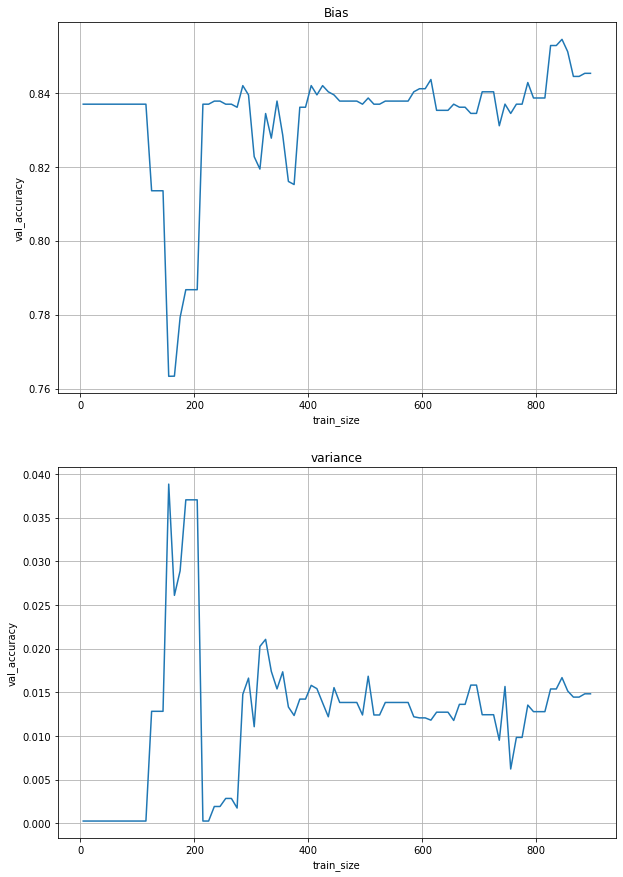

In [348]:
plt.figure(figsize = (10,15))
plt.subplot(2,1,1)
plt.plot(tr_size, val_scores_mean)
plt.ylabel('val_accuracy')
plt.xlabel('train_size')
plt.title('Bias')
plt.grid()

plt.subplot(2,1,2)
plt.plot(tr_size, val_scores_std)
plt.ylabel('val_accuracy')
plt.xlabel('train_size')
plt.title('variance')
plt.grid()
plt.show()

### 모델 복잡도
 - 변수가 많아 질수록 정확도는 향상되지만 복잡도가 높아진다
 - 모델의 복잡도가 높아지면 이상치에 데이터 전체의 특성이나 데이터의 패턴을 가질수 없다.  
 (성능이 떨어진다)

In [366]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [372]:
# 데이터분할1
target = 'Sales'
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 가변수화
dumm_cols = ['ShelveLoc','Education','Urban', 'US']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

# 데이터 분할2
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2
                                                  , random_state = 2022)

# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

* 가장 단순한 모델(평균모델)
    * knn : k를 최대로 크게하면 평균 모델이 됨.
    * k의 최대값은 학습 데이터의 행 수

In [375]:
n = x_train_s.shape[0]
model = KNeighborsRegressor(n_neighbors =n) # train set의 행 수
model.fit(x_train_s, y_train)
pred_train = model.predict(x_train_s)

In [376]:
# 결과 plotting
def reg_plot(y, pred, title='') :
    plt.scatter(y, pred)
    lin_x = np.linspace(y.min(), y.max(), 20)
    plt.plot(lin_x, lin_x, color = 'gray')

    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()

y_train 의 평균 :  7.591281250000004


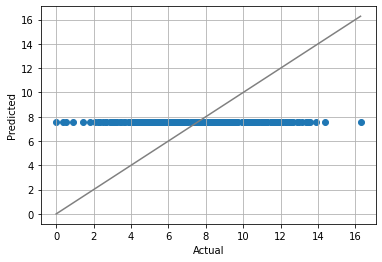

In [377]:
print('y_train 의 평균 : ', y_train.mean())
reg_plot(y_train, pred_train)
# y_train.mean()

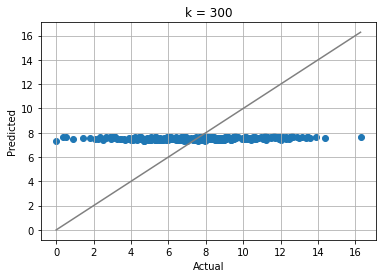

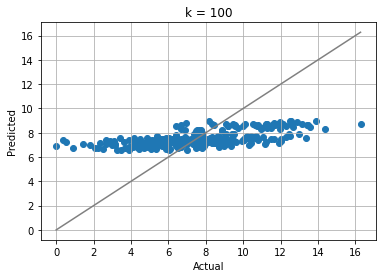

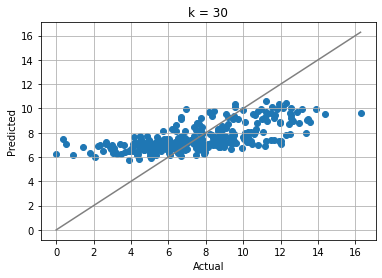

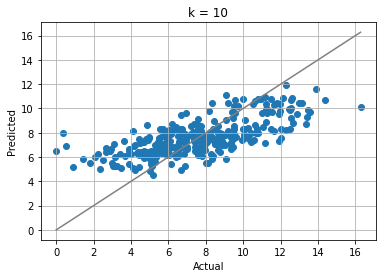

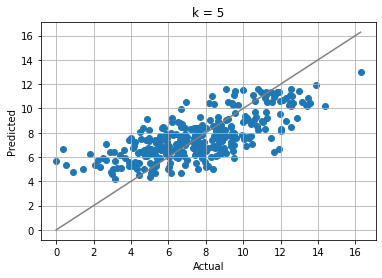

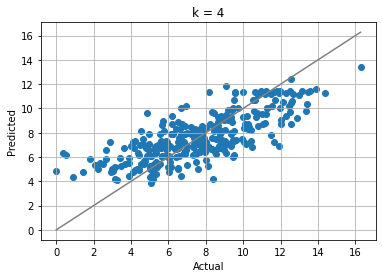

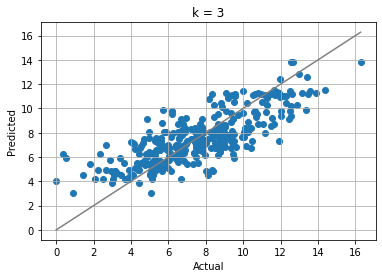

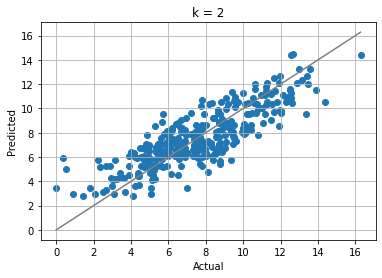

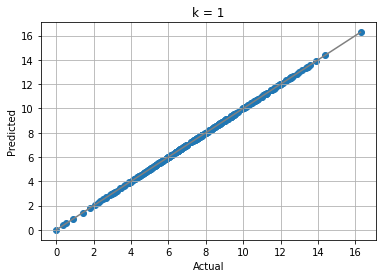

In [378]:
# 아래 90의 숫자를 줄여가며 모델링을 수행해 봅시다.
for n in [300,100,30,10,5,4,3,2,1] :
    model = KNeighborsRegressor(n_neighbors = n) # train set의 행 수
    model.fit(x_train_s, y_train)
    pred = model.predict(x_train_s)

    # 결과 plotting
    reg_plot(y_train, pred, f'k = {n}')
    plt.show()